# Assessment 1: 

In [1]:
import pandas as pd

In [2]:
#1) Import pandas and read in the banklist.csv file into a dataframe called Banks.
banks=pd.read_csv("banklist.csv")
banks

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17
...,...,...,...,...,...,...,...
548,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",27-Jul-01,19-Aug-14
549,Malta National Bank,Malta,OH,6629,North Valley Bank,3-May-01,18-Nov-02
550,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2-Feb-01,18-Feb-03
551,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,14-Dec-00,17-Mar-05


In [3]:
#2) Show the head of the dataframe.
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
1,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
2,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,26-Jul-17
3,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,3-Mar-17,18-May-17
4,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,27-Jan-17,18-May-17


In [4]:
#3) What are the column names? 
banks.columns

Index(['Bank Name', 'City', 'ST', 'CERT', 'Acquiring Institution',
       'Closing Date', 'Updated Date'],
      dtype='object')

In [5]:
#4) How many States (ST) are represented in this data set? 
num_states = banks["ST"].nunique()
print(f"Number of unique states: {num_states}")

Number of unique states: 44


In [6]:
#5) Get a list or array of all the states in the data set.
states_list = banks["ST"].unique()
print("List of states:\n", states_list)

List of states:
 ['IL' 'WI' 'LA' 'UT' 'NJ' 'AR' 'GA' 'PA' 'TN' 'WA' 'CO' 'PR' 'FL' 'MN'
 'CA' 'MD' 'OK' 'OH' 'SC' 'VA' 'ID' 'TX' 'CT' 'AZ' 'NV' 'NC' 'KY' 'MO'
 'KS' 'AL' 'MI' 'IN' 'IA' 'NE' 'MS' 'NM' 'OR' 'NY' 'MA' 'SD' 'WY' 'WV'
 'NH' 'HI']


In [7]:
#6) What are the top 5 states with the most failed banks?
top_states = banks["ST"].value_counts().head(5)
print("Top 5 states with most failed banks:")
print(top_states)

Top 5 states with most failed banks:
ST
GA    93
FL    75
IL    68
CA    41
MN    23
Name: count, dtype: int64


In [8]:
#7) What are the top 5 acquiring institutions? 
top_acquirers = banks["Acquiring Institution"].value_counts().head(5)
print("Top 5 acquiring institutions:")
print(top_acquirers)

Top 5 acquiring institutions:
Acquiring Institution
No Acquirer                            31
State Bank and Trust Company           12
First-Citizens Bank & Trust Company    11
Ameris Bank                            10
U.S. Bank N.A.                          9
Name: count, dtype: int64


In [9]:
#8) How many banks has the State Bank of Texas acquired? How many of them were actually in Texas?
total = (banks["Acquiring Institution"] == "State Bank of Texas").sum()
texas = ((banks["Acquiring Institution"] == "State Bank of Texas") & (banks["ST"] == "TX")).sum()
print(f"State Bank of Texas acquired {total} banks, out of which {texas} were in Texas.")

State Bank of Texas acquired 3 banks, out of which 1 were in Texas.


In [10]:
#9) What is the most common city in California for a bank to fail in?
most_common_city = banks[banks["ST"] == "CA"]["City"].mode()[0]
print(f"The most common city in California for a bank to fail is  {most_common_city}.")

The most common city in California for a bank to fail is  Los Angeles.


# Assessment 2: 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("historical_automobile_sales.csv")  
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


In [13]:
# Q 1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year. 

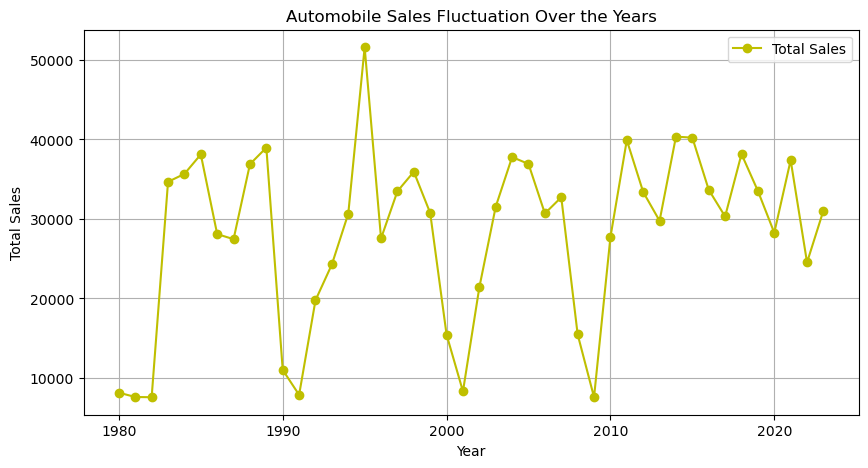

In [14]:
yearly_sales = df.groupby("Year")["Automobile_Sales"].sum()

plt.figure(figsize=(10, 5))
plt.plot(yearly_sales.index, yearly_sales.values, marker="o", linestyle="-", color="y", label="Total Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Automobile Sales Fluctuation Over the Years")
plt.legend()
plt.grid()
plt.show()

In [15]:
#Q 2: Plot different lines for categories of vehicle type and analyze the trend to answer the question Is there a noticeable difference in 
#sales trends between different vehicle types during recession periods?

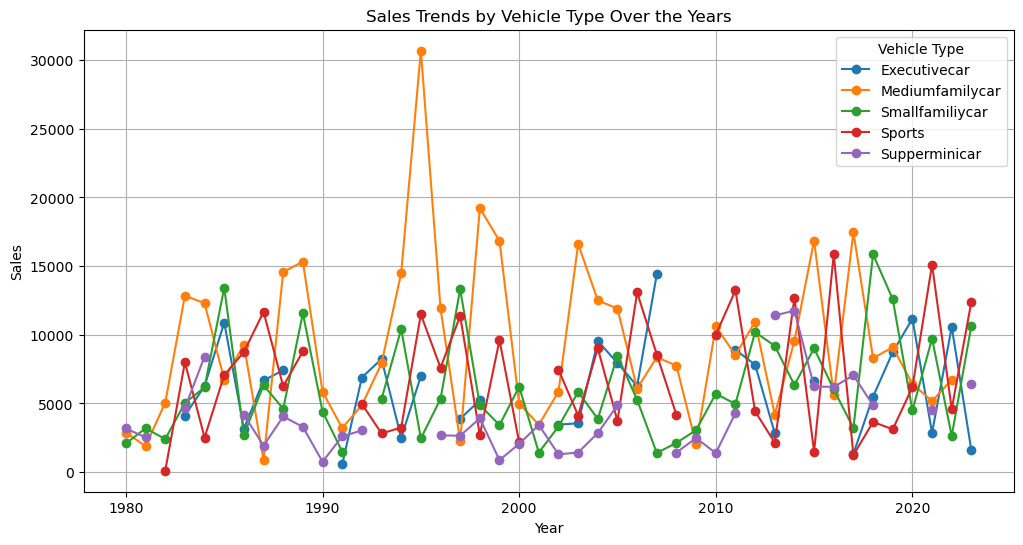

In [16]:
vehicle_sales = df.pivot_table(index="Year", columns="Vehicle_Type", values="Automobile_Sales", aggfunc="sum")

vehicle_sales.plot(figsize=(12, 6), marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Sales Trends by Vehicle Type Over the Years")
plt.legend(title="Vehicle Type")
plt.grid()
plt.show()

In [17]:
#Q 3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for
#a recession period with a non- recession period."""

In [22]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


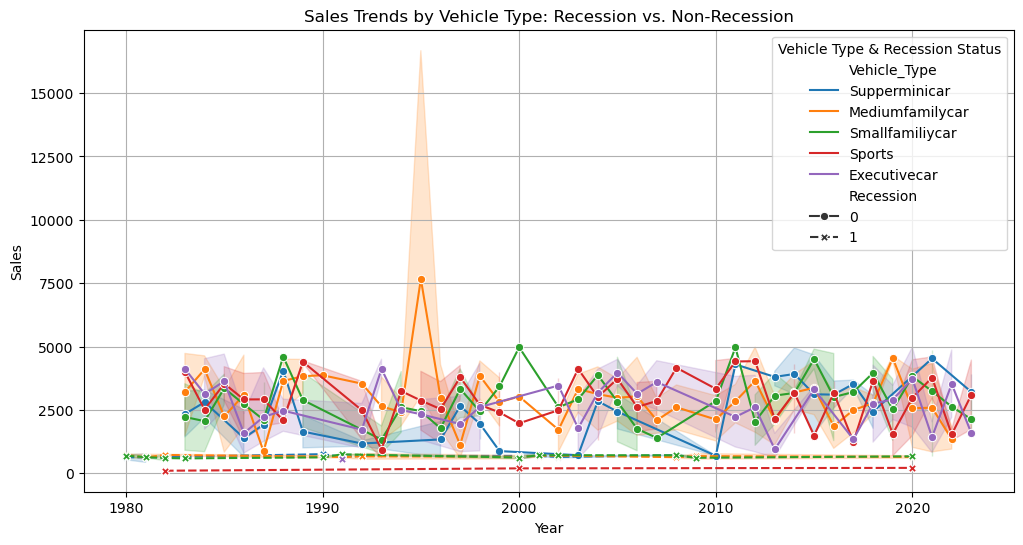

In [23]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Automobile_Sales", hue="Vehicle_Type", style="Recession", markers=True)
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Sales Trends by Vehicle Type: Recession vs. Non-Recession")
plt.legend(title="Vehicle Type & Recession Status")
plt.grid()
plt.show()

In [24]:
#Q 4: Now you want to compare the sales of different vehicle types during a recession and a non-recession period

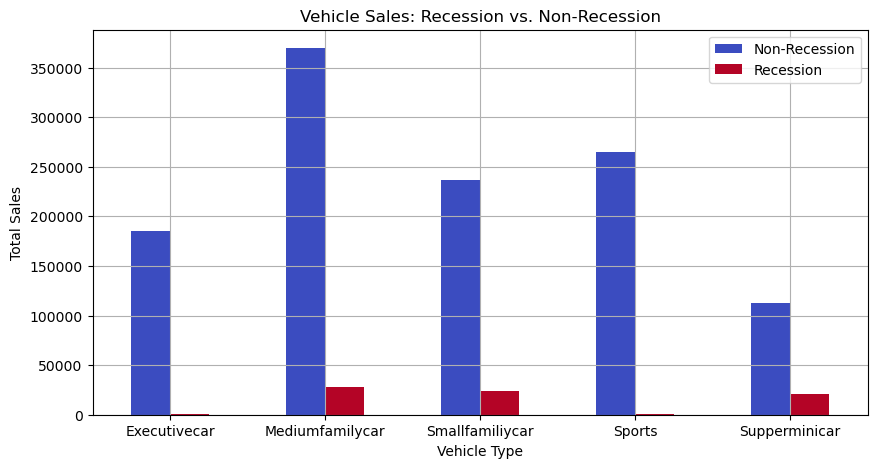

In [25]:
recession_sales = df.pivot_table(index="Vehicle_Type", columns="Recession", values="Automobile_Sales", aggfunc="sum")

recession_sales.plot(kind="bar", figsize=(10, 5), colormap="coolwarm")
plt.xlabel("Vehicle Type")
plt.ylabel("Total Sales")
plt.title("Vehicle Sales: Recession vs. Non-Recession")
plt.legend(["Non-Recession", "Recession"])
plt.xticks(rotation=0)
plt.grid()
plt.show()